In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [3]:
# Training settings
batch_size = 128

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


(28, 28)


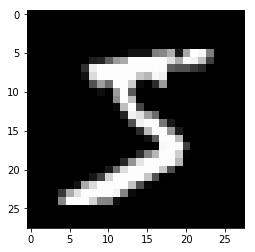

In [4]:
#Visualizing single digit:
temp = train_loader.dataset[0][0].numpy()
#print (temp)
temp = np.reshape(a=temp,newshape=(temp.shape[1],temp.shape[2]))
plt.imshow(temp, cmap='gray')
print (temp.shape)

In [5]:
print (np.unique(temp))

[0.         0.00392157 0.00784314 0.01176471 0.03529412 0.04313726
 0.05490196 0.0627451  0.07058824 0.09019608 0.09411765 0.09803922
 0.10196079 0.10588235 0.11764706 0.13725491 0.14117648 0.15294118
 0.16862746 0.1764706  0.18039216 0.19215687 0.21568628 0.21960784
 0.2509804  0.25882354 0.27450982 0.30588236 0.3137255  0.31764707
 0.32156864 0.3529412  0.3647059  0.36862746 0.41960785 0.42352942
 0.44705883 0.46666667 0.49411765 0.49803922 0.50980395 0.5176471
 0.52156866 0.5294118  0.53333336 0.54509807 0.5803922  0.5882353
 0.6039216  0.6117647  0.627451   0.6509804  0.6666667  0.67058825
 0.6745098  0.6862745  0.7137255  0.7176471  0.7294118  0.73333335
 0.74509805 0.7647059  0.7764706  0.7882353  0.8039216  0.8117647
 0.83137256 0.8352941  0.85882354 0.8666667  0.88235295 0.8862745
 0.8980392  0.93333334 0.9411765  0.94509804 0.9490196  0.95686275
 0.96862745 0.9764706  0.98039216 0.9843137  0.9882353  0.99215686
 1.        ]


In [6]:
# model for prework

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(784, 8)
        self.l2 = nn.Linear(8, 10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the data (n, 1, 28, 28)-> (n, 784)
        x = torch.sigmoid(self.l1(x))
        return self.l2(x)


model = Net()
print (model)
count_parameters(model)

Net(
  (l1): Linear(in_features=784, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=10, bias=True)
)


6370

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
for epoch in range(5):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #print (target)
        #data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            #print (len(target))
            print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 0 | Batch Status: 0/60000 (0%) | Loss: 2.364423
Train Epoch: 0 | Batch Status: 12800/60000 (21%) | Loss: 2.341848
Train Epoch: 0 | Batch Status: 25600/60000 (43%) | Loss: 2.263292
Train Epoch: 0 | Batch Status: 38400/60000 (64%) | Loss: 2.231542
Train Epoch: 0 | Batch Status: 51200/60000 (85%) | Loss: 2.218867
Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 2.203284
Train Epoch: 1 | Batch Status: 12800/60000 (21%) | Loss: 2.163749
Train Epoch: 1 | Batch Status: 25600/60000 (43%) | Loss: 2.171575
Train Epoch: 1 | Batch Status: 38400/60000 (64%) | Loss: 2.090332
Train Epoch: 1 | Batch Status: 51200/60000 (85%) | Loss: 2.068186
Train Epoch: 2 | Batch Status: 0/60000 (0%) | Loss: 2.065332
Train Epoch: 2 | Batch Status: 12800/60000 (21%) | Loss: 2.016427
Train Epoch: 2 | Batch Status: 25600/60000 (43%) | Loss: 1.986718
Train Epoch: 2 | Batch Status: 38400/60000 (64%) | Loss: 1.983937
Train Epoch: 2 | Batch Status: 51200/60000 (85%) | Loss: 1.928756
Train Epoch: 3 | Batch St

In [9]:
print (data.shape)
print (len(train_loader.dataset))
print (batch_idx)
print (len(target))
print (loss)

torch.Size([96, 1, 28, 28])
60000
468
96
tensor(1.6744, grad_fn=<NllLossBackward>)


In [10]:
#Evaulate the model

model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    #data, target = data.to(device), target.to(device)
    output = model(data)
    #print (output)
    # sum up batch loss
    test_loss += criterion(output, target).item()
    # get the index of the max
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(test_loader.dataset)
print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
     f'({100. * correct / len(test_loader.dataset):.0f}%)')

Test set: Average loss: 0.0128, Accuracy: 6464/10000 (64%)


In [ ]:
Extra OLd Stuff below here

In [ ]:
## Origional


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()
print (model)

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #print (target)
        #data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = data.to(device), target.to(device)
        output = model(data)
        print (output)
        # sum up batch loss
        test_loss += criterion(output, target).item()
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')

In [ ]:
for epoch in range(1, 2):
    train(epoch)
    test()

In [ ]:
Extra OLd Stuff below here

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                #100. * batch_idx / len(train_loader), loss.data[0]))
                100. * batch_idx / len(train_loader), loss.data))


In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        #test_loss += F.nll_loss(output, target, size_average=False).data[0]
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 5):
    train(epoch)
    test()

In [ ]:
torch.save(model.state_dict(), 'MNIST-first-test.pt')